In [1]:
import numpy, pandas

df = pandas.read_csv("./data/algebra_2006_2007_train.txt", sep="\t")


df = df[df["Step End Time"].str.startswith("2006")]
df["step_date"] = df["Step End Time"].str[0:10]
dates = df.step_date.unique()

df_d_grpd = df.groupby(["step_date"])
max_len_d=0
most_active_day = None
for d in dates:
    len_d = len(df_d_grpd.groups[d])
    print(d, len_d)
    if len_d > max_len_d:
        max_len_d = len_d
        most_active_day = d

print("***", most_active_day, max_len_d)

df = df[df["step_date"]==most_active_day]

df.rename(columns={"Anon Student Id":"s_id", "Problem Name":"p_id"}, inplace=True)
df["ps_id"] = df["p_id"]+"|"+df["Step Name"]
# students = df["s_id"].unique()
students = df["s_id"].unique()
# students = numpy.random.choice(students, size=min(1000,len(students)), replace=False)
students = list(students)
# problems = numpy.random.choice(df["p_id"].unique(), size=1000, replace=False)
problems = list(df["p_id"].unique())
problem_steps = list(df["ps_id"].unique())
# print(list(unique_problem_names))

2006-10-26 8922
2006-10-31 22562
2006-11-14 31582
2006-12-18 7671
2006-09-05 12541
2006-09-14 6570
2006-09-19 11810
2006-09-28 6917
2006-10-02 11400
2006-10-12 8616
2006-10-17 32723
2006-11-09 15926
2006-11-28 27409
2006-12-07 18553
2006-12-12 26951
2006-09-06 12752
2006-09-15 4528
2006-09-20 8510
2006-09-27 10693
2006-09-29 4902
2006-10-13 4799
2006-10-18 24895
2006-11-01 20942
2006-11-08 24645
2006-11-15 27607
2006-11-29 17690
2006-12-08 9999
2006-12-11 6297
2006-12-13 23120
2006-10-04 9206
2006-10-23 16580
2006-12-21 3145
2006-11-22 15253
2006-11-13 3150
2006-10-27 8083
2006-10-10 7090
2006-10-11 6221
2006-10-14 180
2006-10-15 100
2006-11-10 929
2006-11-11 90
2006-09-07 3527
2006-09-21 2863
2006-10-05 3433
2006-10-19 18814
2006-10-21 277
2006-10-22 579
2006-11-02 6043
2006-11-16 18445
2006-11-30 8740
2006-12-14 12803
2006-10-25 4716
2006-11-03 12276
2006-10-20 15887
2006-11-06 7950
2006-11-07 30888
2006-11-27 18058
2006-10-30 16371
2006-11-20 12721
2006-10-06 2763
2006-11-19 545
200

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
print(problem_steps)

['PERCENT14A|R3C2', 'PERCENT14A|R5C1', 'PERCENT14A|R5C2', 'PERCENT14A|R6C2', 'PERCENT14A|ValidEquations', 'PERCENT14A|0.8i+20 = 281.6', 'PERCENT14A|1.25(0.8i+20) = 352', 'PERCENT14A|1.5625(0.8i+20) = 440', 'PERCENT14A|0.8i = 261.6', 'PERCENT14A|R6C1', 'PERCENT14A|R7C1', 'PERCENT14A|R7C2', 'L2FB15|R1C2', 'L2FB15|R1C1', 'L2FB15|R2C2', 'L2FB15|R2C1', 'L2FB15|R3C1', 'L2FB15|R3C2', 'L2FB15|R4C1', 'L2FB15|R4C2', 'L2FB15|R5C1', 'L2FB15|R5C2', 'L2FB15|R6C2', 'L2FB15|R7C2', 'L2FB15|ValidEquations', 'L2FB15|0.23M-7.87 = 38.13', 'L2FB15|0.23M = 46', 'L2FB15|R6C1', 'L2FB15|0.23M-7.87 = 31', 'L2FB15|0.23M = 38.87', 'L2FB15|R7C1', 'RATIO4-035|FirstRow2:2', 'RATIO4-035|FirstRow2:1', 'RATIO4-035|FirstRow1:2', 'RATIO4-035|FirstRow1:1', 'RATIO4-035|SecondRow', 'RATIO4-035|GeneralHelpGoalNode', 'RATIO4-035|ThirdRow', 'RATIO4-035|FinalAnswer', 'RATIO4-068|NumeratorLabel1', 'RATIO4-068|DenominatorLabel1', 'RATIO4-068|NumeratorQuantity1', 'RATIO4-068|DenominatorQuantity1', 'RATIO4-068|NumeratorQuantity2', '

In [3]:
print(len(problems))
print(len(students))

from collections import defaultdict
p_st = defaultdict(set)
p_kc = defaultdict(set)
i=0
sks_df = df[["p_id","Step Name", "KC(Default)"]].drop_duplicates()
print(len(sks_df))
# for row in sks_df.iterrows():
#     print(row)

for row in sks_df.iterrows():
    (p,s,k) = row[1]
    p_st[p].add(s)#.update(sp_step_df["Step Name"])
    p_kc[p].add(k)#update(sp_step_df["KC(Default)"])
for p in p_st:
    print("({})\t\t".format(p),len(p_st[p]), len(p_kc[p]))

3007
371
19338
(PERCENT14A)		 29 15
(L2FB15)		 20 9
(RATIO4-035)		 8 8
(RATIO4-068)		 13 13
(RATIO4-037)		 13 13
(RATIO4-196)		 13 13
(RATIO4-197)		 14 14
(RATIO4-067)		 14 14
(RATIO4-112)		 13 13
(RATIO4-159)		 8 8
(PROP04)		 20 8
(PROP07)		 19 9
(PROP05)		 19 9
(PROP08)		 15 5
(PROP03)		 20 8
(PROP12)		 17 9
(PROP01)		 19 8
(PROP02)		 18 8
(EG40 -8+(-3x) = 1)		 6 6
(Eg40 -1+(-9x) = 5)		 6 5
(Eg40 3+3x = -6)		 6 5
(Eg40 10+(-8y) = -10)		 6 5
(EG40 5y+5 = -1)		 6 4
(Eg40 -7x+(-4) = 8)		 7 6
(Eg40 -3+9y = -8)		 6 4
(EG41 x/-4+6 = -9)		 6 4
(Eg41 1+y/8 = 6)		 6 5
(Eg41 y/8+5 = -2)		 6 5
(EG41 -8+(x/-5) = 7)		 6 4
(Eg41 0 = y/8+9)		 6 4
(Eg41 y/-10+5 = -7)		 6 4
(Eg44 6/x = 2)		 5 5
(EG44 -3 = 10/y)		 4 4
(LDEMO_4QGRPH)		 44 14
(BH1T23A)		 33 11
(BH1T35B)		 37 11
(REAL17)		 34 11
(NOV04A)		 34 11
(BH1T35)		 37 11
(NOV04)		 34 11
(REAL17C)		 33 11
(BH1T21C)		 32 11
(NEWS01C)		 34 10
(REAL17B)		 34 11
(BH1T39A)		 38 11
(L3NOV10A)		 34 11
(L3NOV12)		 34 10
(BH1T29B)		 38 11
(REAL19)		 32 10


(EG56A 5652.85 = 8888.15(x+2575.36))		 3 3
(EG56 77.56(x+30.83) = -61.12)		 3 3
(EG56A -7487.77 = 7804.63(x+(-3646.51)))		 3 3
(EG56 3.28 = 18.01(y+(-43.38)))		 3 3
(EG56A 2105.21 = 6929.75(x+7851.03))		 8 6
(EG56 -73.57 = -4.65(x+49.76))		 8 6
(EG56A 5217.04(x+9200.92) = 3329.15)		 4 4
(L3NOV10B)		 34 11
(EG45 6x+2x+6 = 6)		 7 5
(EG46A -42 = 10x+(-20)+x)		 8 7
(EG47A -x+(-34x)+(-13) = -23)		 8 7
(EG46 2+(-8x)+x = -1)		 8 7
(EG47 -8+(-6y)+(-y) = 7)		 14 10
(EG46 2 = 4y+1+y)		 13 9
(EG45 2 = -6y+(-9y)+(-1))		 14 10
(EG49 6 = 1.2x+x)		 4 4
(EG48A 39 = 5y+38.7y)		 4 4
(EG50 -x+(-8.3x) = 9)		 5 5
(EG48 2.2x+(-9x) = 0)		 5 5
(EG49A 25 = 42.2x+x)		 4 4
(EG48 -4 = -4x+(-9.6x))		 5 5
(EG50 -x+2.8x = 4)		 5 4
(EG48 -3 = 4x+7.4x)		 5 4
(EG49 9 = y+(-8y))		 6 5
(EG53 -1.1 = -y+(-1.7y)+(-9.8))		 8 7
(EG52A -1.5x+21.2+x = -33.7)		 7 6
(EG51A -12.9x+36.2x+43.4 = 26.8)		 7 5
(EG53A -10.1y+(-y)+(-45) = -9.3)		 3 3
(EG54 10(y+(-7)) = 3)		 3 3
(Eg54 -6 = 5(x+5))		 3 3
(Eg54 -7(x+(-7)) = -8)		 3 3
(EG54 

(EG15A x = (45+16.3)*4)		 3 3
(EG20 x = 3.1*7)		 2 2
(EG19A 14.7*23 = x)		 2 2
(EG20A y = -39.4*16)		 1 1
(eg6a ?)		 3 3
(EG5B 11+28*29 = y)		 3 3
(EG5A y = 46+36*5)		 3 3
(EG11B x = 72*30)		 2 2
(EG11C y = 64*48)		 3 3
(EG11 8*4 = y)		 2 2
(EG11A 39*99 = x)		 2 2
(EG6C x = 41+25*16)		 3 3
(EG8B 25(43+7) = y)		 3 3
(EG13A 13+5.2*33 = x)		 2 2
(EG17A y = 12.5+(-2.6))		 2 2
(EG19 4.2*8 = x)		 1 1
(EG20 x = -7.3*7)		 1 1
(EG16A 50(24+(-26.1)) = y)		 2 2
(EG20A 15.2*47 = x)		 2 2
(EG18A y = 42.2+(-49.9))		 2 2
(EG14 y = 2*7+8.8)		 2 2
(EG15A (11+25.3)*16 = x)		 2 2
(EG19A x = 17.7*13)		 2 2
(EG15 (9+(-9.7))*9 = y)		 2 2
(EG17 6.3+9.9 = x)		 2 2
(EG16 2(9+2.2) = x)		 2 2
(EG13 y = -5.8*9+2)		 2 2
(EG14A -8.6+31*24 = y)		 2 2
(EG13 4+9.7*9 = x)		 2 2
(EG14 y = 5*9+(-5.6))		 2 2
(EG13 y = 3+(-2.9*4))		 2 2
(EG16 6(2+1.6) = x)		 2 2
(BH1T30C)		 2 2
(RXMX_2B)		 11 6
(EMX04C)		 10 5
(L3NOV12C)		 30 9
(eg7b ?)		 2 2
(EG7C x = (36+38)*46)		 3 3
(EG8 y = 7(2+7))		 7 5
(EG8C x = 18(18+17))		 7 5
(EG

(Eg41 y/8+2 = -7)		 6 5
(Eg41 5 = x/-7+3)		 6 4
(Eg41 y/-3+(-9) = -9)		 6 4
(EG41 8 = -9+x/7)		 6 4
(Eg41 -7+x/6 = 6)		 6 4
(Eg41 -2 = -4+(x/-7))		 6 4
(Eg41 -7 = -2+(x/-9))		 6 4
(Eg41 0 = -8+x/6)		 6 4
(EG44 9/x = 9)		 6 6
(Eg44 -2 = 6/y)		 5 5
(Eg44 10/y = 6)		 5 5
(Eg44 -6/y = -8)		 5 5
(Eg44 -3 = 3/y)		 3 3
(BH1T19C)		 5 4
(DEC03B)		 11 6
(JAN11B)		 11 6
(EG41 -1 = -8+x/9)		 6 4
(Eg41 -6 = y/-6+(-3))		 6 4
(Eg41 -6 = 6+(x/-8))		 6 4
(EG41 y/-3+(-5) = -3)		 6 4
(Eg41 2 = y/-4+9)		 6 4
(Eg41 -5 = y/-3+(-5))		 7 5
(Eg41 4+(x/-6) = 2)		 6 4
(Eg41 3 = 2+y/7)		 6 4
(EG44 -3 = -5/y)		 8 6
(Eg44 -3 = 7/x)		 5 5
(Eg44 2/x = -4)		 5 5
(Eg44 7/y = -10)		 5 5
(Eg44 -4 = -9/x)		 5 5
(EG22 y+(-3) = -5)		 5 4
(EG21 y+2 = -6)		 3 2
(Eg21 y+9 = 9)		 3 2
(Eg21 x+4 = -1)		 3 2
(EG22 x+(-2) = 4)		 4 3
(EG21 5+x = -7)		 3 2
(Eg21 -6 = x+7)		 8 2
(Eg21 x+2 = -3)		 3 2
(Eg21 x+4 = 4)		 3 2
(EG22 -10+y = 5)		 3 2
(EG21 -9 = 3+x)		 3 2
(EG21 2+x = -1)		 3 2
(EG22 0 = x+(-9))		 4 3
(EG21 10 = x+4)		 3 2
(E

(RATIO3-103)		 12 11
(RATIO3-028)		 12 11
(RATIO4-131)		 13 13
(RATIO4-200)		 13 13
(RATIO4-008)		 13 13
(RATIO4-094)		 13 13
(RATIO4-005)		 13 13
(RATIO4-061)		 13 13
(RATIO4-096)		 13 13
(RATIO4-127)		 11 11
(Eg40 3 = -9+(-10x))		 6 4
(Eg40 -7x+(-5) = -6)		 6 4
(EG41 -10 = -8+y/2)		 6 4
(Eg41 y/-9+7 = 10)		 6 5
(Eg41 x/-5+(-9) = -3)		 6 5
(EG41 x/8+10 = 4)		 6 4
(Eg41 1 = x/-7+7)		 6 4
(JAN09)		 27 10
(EG40 -1y+(-5) = -4)		 7 6
(Eg40 0 = 3y+5)		 5 4
(Eg40 5+(-7y) = 8)		 6 5
(Eg40 5 = 7+(-4x))		 6 5
(Eg40 -6y+2 = -5)		 6 5
(Eg40 9 = 7+(-2x))		 6 5
(Eg40 7+4y = 9)		 6 5
(EG40 -10+(-1x) = 4)		 7 6
(Eg40 -8+(-4y) = -5)		 17 10
(Eg40 10 = -3x+9)		 7 6
(Eg40 -2+(-9y) = -8)		 11 8
(EG41 9+y/9 = 6)		 6 5
(Eg41 x/7+(-2) = -1)		 6 5
(Eg41 y/-2+5 = -5)		 6 4
(EG41 2 = x/-9+(-10))		 8 6
(Eg41 4+y/5 = -2)		 6 4
(EG3 (8+5)*5)		 2 2
(EG2 2*5+9)		 2 2
(EG4 3(5+9))		 2 2
(EG4 10(2+6))		 3 3
(Eg1 4+1*8)		 3 3
(EG2 6+5*0)		 3 3
(EG3 (8+7)*4)		 3 3
(EG1 6+4*5)		 3 3
(EG2 4+0*7)		 3 3
(EG3 (8+0)*6)		 3 3

In [4]:
import numpy
# for s in unique_student_ids:
#     s_df = df[df["Anon Student Id"]==s]
#     for p in s_df["Problem Name"].unique():
#         print(s,p)
#         sp_step_df = s_df[s_df["Problem Name"]==p].sort_values(by=["Step End Time"])
# #         print(len(sp_step_df))
# # #         print(sp_step_df)
#         for ind,row in sp_step_df[["Step Name","Step End Time","Correct Transaction Time","Incorrects","Corrects","KC(Default)"]].iterrows():
# #             print("\t", list(row))
#             corrs = row["Corrects"]
#             print(corrs)

print("#probs",len(problems))
print("#students",len(students))
KCs = set(df["KC(Default)"].unique())
print("#KCs",len(KCs))

print("#problem_steps", len(problem_steps))

# print(df[0:10])

all_sz = []
all_qz = []
all_pfz= []

q_pass = defaultdict(int)
q_atts = defaultdict(int)

ps_seen = []

for s in students:
    s_ix = students.index(s)
    s_df = df[df["s_id"]==s]
    students_probsteps = s_df["ps_id"].unique()
    for p_s in students_probsteps:
#         if p not in seld_problems:
#             seld_problems.append(p)
#         sp_step_df = s_df[(s_df["p_id"]==p) & (s_df["Corrects"]>=1 )]#.sort_values(by=["Step End Time"])
#         steps_not_done = p_st[p] - set(sp_step_df["Step Name"])
        steps = s_df[(s_df["ps_id"]==p_s)]
#         if  in steps:
#             steps_not_done.remove("GeneralHelpGoalNode")
        for row in steps[["Step Name","Corrects"]].iterrows():
            sname, corrs = row[1]
            if p_s.endswith("GeneralHelpGoalNode"):
                continue
            if p_s not in ps_seen:
                ps_seen.append(p_s)
            ps_ix = ps_seen.index(p_s)

#             print(corrs)                

            if corrs == 0:
                all_pfz.append(0)
                all_sz.append(s_ix)
                all_qz.append(ps_ix)
            else:
                n_ones = sum(all_pfz)
                n_zeros = len(all_pfz)-n_ones
                if n_ones < n_zeros*4:
                    all_pfz.append(1)
                    all_sz.append(s_ix)
                    all_qz.append(ps_ix)
                    q_pass[p_s]+=1
            q_atts[p_s]+=1

# all_sz = numpy.array(all_sz).reshape([-1,1])
# all_qz = numpy.array(all_qz).reshape([-1,1])
# all_pfz = numpy.array(all_pfz).reshape([-1,1])

print(len(ps_seen))
print(sum(all_pfz),len(all_pfz))
print(all_pfz)

#probs 3007
#students 371
#KCs 276
#problem_steps 19226
18923
2296 2870
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 

In [5]:
# from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda
from keras import backend as K
from keras import Model
def generate_qs_model(qn_table, psi_table, optimiser, reg=True):
    psi_sel = Input(shape=(1,), name="psi_select", dtype="int32")
    qn_sel = Input(shape=(1,), name="q_select", dtype="int32")
    print(qn_table, psi_table, psi_sel, qn_sel)
    print("psi_sel shape", psi_sel.shape)

    psi_table.trainable=True
    qn_table.trainable=True
    
    def custom_loss(mag_loss):
        def orig_loss(yt,yh):
            bc = K.binary_crossentropy(yt,yh)
            return (bc * mag_loss/10e8) if (mag_loss is not None) else bc
        return orig_loss
    
    qn_row = qn_table(qn_sel)
#     qn_row = GaussianNoise(.5)(qn_row)
    psi_row = psi_table(psi_sel)
#     psi_row = GaussianNoise(0.5)(psi_row)
    
#     L_2 = Lambda(lambda w: K.sqrt(K.mean(K.square(w))))
    L_2 = Lambda(lambda w: K.sum(K.abs(w)))
    qn_ws = qn_table.weights[0]
    psi_ws = psi_table.weights[0]
#     mag_loss = (L_2(qn_ws)+ L_2(psi_ws))/2.0 if reg else None
    mag_loss = L_2(psi_ws) if reg else None

#     prds = multiply([qn_row, psi_row])
    difs = subtract([psi_row, qn_row])
#     score = Lambda(lambda ps: K.sum(ps, axis=1, keepdims=True)/n_factors, name="score")(prds)
    Prs = Lambda(lambda z: (1.0 / (1.0 + K.exp(-z))), name="Pr_sigmoid1")(difs)
    
    score = Lambda(lambda ps: K.prod(ps, axis=1, keepdims=True), name="score")(Prs)
    
    model = Model(inputs=[qn_sel, psi_sel], outputs=score)
#     model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])
    model.compile(optimizer=optimiser, loss=custom_loss(mag_loss), metrics=["accuracy"])

    print(model.summary())

    return model

Using TensorFlow backend.


In [6]:
from NN_utils import BigTable, WeightClip
from keras.optimizers import Adam
from keras import regularizers

n_factors = len(KCs)
n_students = len(students)
n_questions = len(problems)
n_probsteps = len(ps_seen)

n_factors=n_factors
inv_sigmoid = lambda p: -numpy.log(1/p - 1)
p50 = inv_sigmoid( 0.5**(1/n_factors) )
print("p50 is ", p50)

s_table =  BigTable((n_students, n_factors), 0, 100, init_hilo=10)#, regulariser=regularizers.l2(10e-20))
qn_table = BigTable((n_probsteps, n_factors), 0, 100, init_hilo=10-p50)#, regulariser=regularizers.l2(10e-20))

frak=1
all_pairs = list(zip(all_sz,all_qz))
print(all_pairs)
# print(all_pairs)
all_pair_ixs = list(range(len(all_pairs)))
# ixs_to_use = numpy.random.choice(all_pair_ixs, size=int(max(frak*len(all_pairs),10)), replace=True)
# pairs_to_use = numpy.array(all_pairs)[ixs_to_use]

all_ixs = list(range(len(all_pfz)))
val_ixs = numpy.random.choice(all_pair_ixs, size=int(len(all_pair_ixs)/20), replace=False) #len(attempts)//100, replace=False)
trn_ixs = list(set(all_ixs) - set(val_ixs))
# test_ixs = val_ixs
test_ixs = val_ixs[0:len(val_ixs)//2]
val_ixs = val_ixs[len(val_ixs)//2:]

vsz = numpy.array(all_sz)[val_ixs]
vqz = numpy.array(all_qz)[val_ixs]
vpfz = numpy.array(all_pfz)[val_ixs]

tsz = numpy.array(all_sz)[test_ixs]
tqz = numpy.array(all_qz)[test_ixs]
tpfz = numpy.array(all_pfz)[test_ixs]

sz = numpy.array(all_sz)[trn_ixs]
qz = numpy.array(all_qz)[trn_ixs]
pfz = numpy.array(all_pfz)[trn_ixs]

p50 is  5.98565782209
[(0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 329), (1, 330), (1, 331), (1, 332), (1, 333), (2, 418), (2, 418), (2, 419), (2, 420), (2, 421), (6, 879), (6, 880), (6, 881), (6, 882), (6, 883), (6, 884), (6, 885), (6, 886), (6, 887), (6, 888), (6, 901), (6, 902), (6, 903), (6, 904), (6, 905), (6, 911), (6, 912), (6, 913), (6, 914), (6, 915), (6, 916), (6, 917), (6, 918), (6, 919), (6, 920), (6, 924), (6, 925), (6, 926), (6, 927), (6, 928), (6, 930), (6, 931), (6, 932), (6, 933), (6, 934), (6, 956), (6, 957), (6, 958), (6, 959), (6, 960), (6, 961), (6, 962), (6, 963), (6, 964), (6, 965), (6, 966), (6, 967), (6, 968), (6, 969), (6, 970), (6, 986), (6, 987), (6, 988), (6, 989), (6, 990), (6, 999), (6, 1000), (6, 1001), (6, 1002), (6, 1003), (6, 1004), (6, 1005), (6, 1006), (6, 1007), (6, 1008), (7, 1270), (7, 1271), (7, 1272), (7, 1273), (7, 1274), (8, 1409), (8, 1410), (8, 1411), (8, 1412), (8, 1413), (9, 1485), (9, 1486), (9, 1487), (9, 1488), (9, 1489), (9, 1571), (

In [7]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="loss", restore_best_weights=True, patience=10)
prior = sum( pfz==1 )/len(all_pfz)
initpfz = [0.5 for _ in range(len(all_pfz))]

m = generate_qs_model(qn_table, s_table, Adam(), reg=False)
m.fit(x=[all_qz,all_sz], y=numpy.array(initpfz).reshape(-1,1), batch_size=10000, shuffle=True, epochs=1000, verbose=1, callbacks=[es])#, validation_split=1000/len(initpfz))

Instructions for updating:
Colocations handled automatically by placer.
<NN_utils.BigTable object at 0x7f96e630e198> <NN_utils.BigTable object at 0x7f96e630e160> Tensor("psi_select:0", shape=(?, 1), dtype=int32) Tensor("q_select:0", shape=(?, 1), dtype=int32)
psi_sel shape (?, 1)
kk (18923, 276)
selector shape (?, 1)
flat selector shape (?,)
call kk (18923, 276)
'rows' shape, (?, 276)
kk (371, 276)
selector shape (?, 1)
flat selector shape (?,)
call kk (371, 276)
'rows' shape, (?, 276)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
q_select (InputLayer)           (None, 1)            0                                            
______________

Epoch 47/1000
2870/2870 [==============================] - 0s 62us/step - loss: 0.7127 - acc: 0.0000e+00
Epoch 48/1000
2870/2870 [==============================] - 0s 61us/step - loss: 0.7125 - acc: 0.0000e+00
Epoch 49/1000
2870/2870 [==============================] - 0s 65us/step - loss: 0.7124 - acc: 0.0000e+00
Epoch 50/1000
2870/2870 [==============================] - 0s 62us/step - loss: 0.7122 - acc: 0.0000e+00
Epoch 51/1000
2870/2870 [==============================] - 0s 62us/step - loss: 0.7120 - acc: 0.0000e+00
Epoch 52/1000
2870/2870 [==============================] - 0s 61us/step - loss: 0.7118 - acc: 0.0000e+00
Epoch 53/1000
2870/2870 [==============================] - 0s 60us/step - loss: 0.7117 - acc: 0.0000e+00
Epoch 54/1000
2870/2870 [==============================] - 0s 60us/step - loss: 0.7115 - acc: 0.0000e+00
Epoch 55/1000
2870/2870 [==============================] - 0s 61us/step - loss: 0.7113 - acc: 0.0000e+00
Epoch 56/1000
2870/2870 [==============================

Epoch 125/1000
2870/2870 [==============================] - 0s 64us/step - loss: 0.7021 - acc: 0.0000e+00
Epoch 126/1000
2870/2870 [==============================] - 0s 61us/step - loss: 0.7020 - acc: 0.0000e+00
Epoch 127/1000
2870/2870 [==============================] - 0s 54us/step - loss: 0.7019 - acc: 0.0000e+00
Epoch 128/1000
2870/2870 [==============================] - 0s 60us/step - loss: 0.7018 - acc: 0.0000e+00
Epoch 129/1000
2870/2870 [==============================] - 0s 54us/step - loss: 0.7017 - acc: 0.0000e+00
Epoch 130/1000
2870/2870 [==============================] - 0s 57us/step - loss: 0.7016 - acc: 0.0000e+00
Epoch 131/1000
2870/2870 [==============================] - 0s 69us/step - loss: 0.7015 - acc: 0.0000e+00
Epoch 132/1000
2870/2870 [==============================] - 0s 70us/step - loss: 0.7014 - acc: 0.0000e+00
Epoch 133/1000
2870/2870 [==============================] - 0s 61us/step - loss: 0.7014 - acc: 0.0000e+00
Epoch 134/1000
2870/2870 [====================

Epoch 203/1000
2870/2870 [==============================] - 0s 63us/step - loss: 0.6968 - acc: 0.0000e+00
Epoch 204/1000
2870/2870 [==============================] - 0s 62us/step - loss: 0.6968 - acc: 0.0000e+00
Epoch 205/1000
2870/2870 [==============================] - 0s 63us/step - loss: 0.6968 - acc: 0.0000e+00
Epoch 206/1000
2870/2870 [==============================] - 0s 55us/step - loss: 0.6967 - acc: 0.0000e+00
Epoch 207/1000
2870/2870 [==============================] - 0s 74us/step - loss: 0.6967 - acc: 0.0000e+00
Epoch 208/1000
2870/2870 [==============================] - 0s 64us/step - loss: 0.6966 - acc: 0.0000e+00
Epoch 209/1000
2870/2870 [==============================] - 0s 73us/step - loss: 0.6966 - acc: 0.0000e+00
Epoch 210/1000
2870/2870 [==============================] - 0s 62us/step - loss: 0.6965 - acc: 0.0000e+00
Epoch 211/1000
2870/2870 [==============================] - 0s 62us/step - loss: 0.6965 - acc: 0.0000e+00
Epoch 212/1000
2870/2870 [====================

Epoch 281/1000
2870/2870 [==============================] - 0s 46us/step - loss: 0.6946 - acc: 0.0000e+00
Epoch 282/1000
2870/2870 [==============================] - 0s 57us/step - loss: 0.6946 - acc: 0.0000e+00
Epoch 283/1000
2870/2870 [==============================] - 0s 56us/step - loss: 0.6945 - acc: 0.0000e+00
Epoch 284/1000
2870/2870 [==============================] - 0s 51us/step - loss: 0.6945 - acc: 0.0000e+00
Epoch 285/1000
2870/2870 [==============================] - 0s 55us/step - loss: 0.6945 - acc: 0.0000e+00
Epoch 286/1000
2870/2870 [==============================] - 0s 52us/step - loss: 0.6945 - acc: 0.0000e+00
Epoch 287/1000
2870/2870 [==============================] - 0s 59us/step - loss: 0.6945 - acc: 0.0000e+00
Epoch 288/1000
2870/2870 [==============================] - 0s 53us/step - loss: 0.6945 - acc: 0.0000e+00
Epoch 289/1000
2870/2870 [==============================] - 0s 47us/step - loss: 0.6944 - acc: 0.0000e+00
Epoch 290/1000
2870/2870 [====================

Epoch 359/1000
2870/2870 [==============================] - 0s 56us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 360/1000
2870/2870 [==============================] - 0s 56us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 361/1000
2870/2870 [==============================] - 0s 61us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 362/1000
2870/2870 [==============================] - 0s 68us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 363/1000
2870/2870 [==============================] - 0s 59us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 364/1000
2870/2870 [==============================] - 0s 55us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 365/1000
2870/2870 [==============================] - 0s 47us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 366/1000
2870/2870 [==============================] - 0s 55us/step - loss: 0.6937 - acc: 0.0000e+00
Epoch 367/1000
2870/2870 [==============================] - 0s 59us/step - loss: 0.6936 - acc: 0.0000e+00
Epoch 368/1000
2870/2870 [====================

Epoch 437/1000
2870/2870 [==============================] - 0s 40us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 438/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 439/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 440/1000
2870/2870 [==============================] - 0s 40us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 441/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 442/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 443/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 444/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 445/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6934 - acc: 0.0000e+00
Epoch 446/1000
2870/2870 [====================

Epoch 515/1000
2870/2870 [==============================] - 0s 43us/step - loss: 0.6933 - acc: 0.0000e+00
Epoch 516/1000
2870/2870 [==============================] - 0s 54us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 517/1000
2870/2870 [==============================] - 0s 49us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 518/1000
2870/2870 [==============================] - 0s 41us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 519/1000
2870/2870 [==============================] - 0s 41us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 520/1000
2870/2870 [==============================] - 0s 59us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 521/1000
2870/2870 [==============================] - 0s 51us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 522/1000
2870/2870 [==============================] - 0s 50us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 523/1000
2870/2870 [==============================] - 0s 50us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 524/1000
2870/2870 [====================

Epoch 593/1000
2870/2870 [==============================] - 0s 54us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 594/1000
2870/2870 [==============================] - 0s 51us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 595/1000
2870/2870 [==============================] - 0s 51us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 596/1000
2870/2870 [==============================] - 0s 48us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 597/1000
2870/2870 [==============================] - 0s 55us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 598/1000
2870/2870 [==============================] - 0s 53us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 599/1000
2870/2870 [==============================] - 0s 48us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 600/1000
2870/2870 [==============================] - 0s 52us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 601/1000
2870/2870 [==============================] - 0s 52us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 602/1000
2870/2870 [====================

Epoch 671/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 672/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 673/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 674/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 675/1000
2870/2870 [==============================] - 0s 36us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 676/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 677/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 678/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 679/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 680/1000
2870/2870 [====================

Epoch 749/1000
2870/2870 [==============================] - 0s 47us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 750/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 751/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 752/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 753/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 754/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 755/1000
2870/2870 [==============================] - 0s 36us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 756/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 757/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 758/1000
2870/2870 [====================

Epoch 827/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 828/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 829/1000
2870/2870 [==============================] - 0s 36us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 830/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 831/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 832/1000
2870/2870 [==============================] - 0s 36us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 833/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 834/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 835/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 836/1000
2870/2870 [====================

Epoch 905/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 906/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 907/1000
2870/2870 [==============================] - 0s 47us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 908/1000
2870/2870 [==============================] - 0s 52us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 909/1000
2870/2870 [==============================] - 0s 46us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 910/1000
2870/2870 [==============================] - 0s 40us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 911/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 912/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 913/1000
2870/2870 [==============================] - 0s 59us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 914/1000
2870/2870 [====================

Epoch 983/1000
2870/2870 [==============================] - 0s 48us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 984/1000
2870/2870 [==============================] - 0s 45us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 985/1000
2870/2870 [==============================] - 0s 52us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 986/1000
2870/2870 [==============================] - 0s 50us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 987/1000
2870/2870 [==============================] - 0s 45us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 988/1000
2870/2870 [==============================] - 0s 37us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 989/1000
2870/2870 [==============================] - 0s 40us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 990/1000
2870/2870 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 991/1000
2870/2870 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 992/1000
2870/2870 [====================

In [8]:
init_predz = m.predict(x=[qz, sz])
for hat,ture in zip(init_predz,pfz):
    print(hat, ture)

[ 0.49984801] 0
[ 0.49918881] 1
[ 0.50036353] 1
[ 0.49769554] 1
[ 0.50232452] 1
[ 0.49939248] 0
[ 0.49991855] 1
[ 0.50005955] 1
[ 0.50050265] 1
[ 0.49985698] 0
[ 0.4986937] 1
[ 0.50065148] 1
[ 0.50067878] 1
[ 0.4975332] 0
[ 0.49934497] 1
[ 0.50018483] 0
[ 0.50081211] 1
[ 0.50008315] 1
[ 0.49939826] 1
[ 0.50060117] 1
[ 0.50003707] 1
[ 0.50022805] 1
[ 0.49944699] 1
[ 0.5004077] 0
[ 0.50014716] 1
[ 0.4982951] 1
[ 0.49834079] 1
[ 0.49737448] 1
[ 0.50057453] 0
[ 0.49678889] 1
[ 0.49964404] 1
[ 0.49937657] 0
[ 0.50051582] 1
[ 0.5001989] 1
[ 0.50020939] 1
[ 0.49838799] 1
[ 0.5093382] 1
[ 0.50589579] 1
[ 0.50023884] 0
[ 0.49992141] 1
[ 0.49921691] 1
[ 0.50014222] 1
[ 0.50042498] 1
[ 0.49926883] 0
[ 0.50015098] 1
[ 0.49878797] 1
[ 0.49933022] 1
[ 0.5002324] 1
[ 0.49974239] 0
[ 0.50059336] 1
[ 0.49875715] 1
[ 0.49960089] 1
[ 0.49959898] 1
[ 0.50043577] 0
[ 0.49964255] 1
[ 0.49942955] 1
[ 0.49918777] 1
[ 0.4991155] 1
[ 0.49859127] 0
[ 0.49994236] 1
[ 0.4990451] 1
[ 0.49814999] 1
[ 0.50068581] 1
[

[ 0.49971858] 1
[ 0.50005203] 1
[ 0.49796411] 1
[ 0.4991605] 1
[ 0.50004256] 0
[ 0.49953783] 0
[ 0.50093633] 1
[ 0.49845502] 1
[ 0.50047594] 1
[ 0.50066173] 1
[ 0.50093144] 1
[ 0.4998005] 1
[ 0.50011814] 1
[ 0.49708208] 1
[ 0.49523321] 0
[ 0.50074643] 1
[ 0.49854201] 0
[ 0.50003833] 1
[ 0.49962282] 0
[ 0.50016528] 0
[ 0.50098431] 1
[ 0.49834391] 1
[ 0.49918157] 1
[ 0.50011778] 1
[ 0.50067139] 1
[ 0.50053233] 0
[ 0.50050813] 1
[ 0.50051898] 1
[ 0.50030077] 1
[ 0.49924973] 1
[ 0.50031954] 1
[ 0.49865159] 1
[ 0.50129479] 1
[ 0.50044543] 1
[ 0.50043154] 1
[ 0.50127786] 1
[ 0.49971318] 1
[ 0.499814] 0
[ 0.50039303] 1
[ 0.49999395] 1
[ 0.49965683] 0
[ 0.4997772] 1
[ 0.49998337] 1
[ 0.49888095] 1
[ 0.50065303] 1
[ 0.49854341] 0
[ 0.49697512] 0
[ 0.49985579] 1
[ 0.49938363] 1
[ 0.49935728] 1
[ 0.50056034] 1
[ 0.49969688] 1
[ 0.50013727] 1
[ 0.4986985] 1
[ 0.4999952] 0
[ 0.4999952] 1
[ 0.50018668] 0
[ 0.50018668] 1
[ 0.50026298] 1
[ 0.49972856] 1
[ 0.50047082] 1
[ 0.50056404] 1
[ 0.50065917] 1


[ 0.49816313] 1
[ 0.499212] 0
[ 0.50072688] 1
[ 0.49994749] 1
[ 0.5009889] 0
[ 0.50112236] 1
[ 0.50105953] 1
[ 0.50109428] 1
[ 0.50022334] 1
[ 0.49993762] 1
[ 0.50200379] 1
[ 0.4998087] 1
[ 0.49931493] 0
[ 0.50057572] 1
[ 0.50016272] 1
[ 0.50036186] 1
[ 0.49912947] 1
[ 0.50105774] 1
[ 0.49786073] 0
[ 0.50168782] 1
[ 0.5011903] 1
[ 0.50128961] 1
[ 0.49906021] 1
[ 0.4978283] 0
[ 0.50035208] 1
[ 0.49800605] 1
[ 0.49986133] 1
[ 0.50095713] 1
[ 0.49959368] 0
[ 0.49845505] 1
[ 0.49671939] 1
[ 0.49890521] 1
[ 0.50035816] 1
[ 0.49783611] 0
[ 0.50098658] 1
[ 0.49919951] 1
[ 0.50006014] 1
[ 0.49880588] 1
[ 0.49671638] 0
[ 0.49685723] 1
[ 0.49885857] 1
[ 0.49727106] 1
[ 0.50001621] 0
[ 0.50085455] 1
[ 0.50117236] 1
[ 0.49931833] 1
[ 0.5003593] 0
[ 0.49907178] 1
[ 0.49890849] 1
[ 0.50112569] 1
[ 0.49973759] 1
[ 0.49985862] 0
[ 0.49863067] 1
[ 0.49903965] 1
[ 0.50122422] 1
[ 0.50205874] 1
[ 0.49997851] 0
[ 0.4998998] 1
[ 0.50084597] 1
[ 0.50168383] 1
[ 0.50070471] 1
[ 0.50038254] 0
[ 0.49762049] 1


[ 0.49544325] 1
[ 0.49970487] 1
[ 0.49998671] 1
[ 0.50247282] 0
[ 0.50232869] 0
[ 0.50125748] 0
[ 0.50680888] 0
[ 0.49986023] 1
[ 0.50398624] 1
[ 0.50070482] 1
[ 0.49927661] 1
[ 0.50007951] 1
[ 0.49843368] 1
[ 0.49755359] 1
[ 0.49991727] 1
[ 0.49823108] 1
[ 0.49960786] 1
[ 0.50024611] 1
[ 0.49967104] 1
[ 0.5000425] 1
[ 0.49928316] 1
[ 0.49966919] 1
[ 0.49995774] 0
[ 0.49876434] 1
[ 0.50014251] 1
[ 0.49947977] 1
[ 0.50365406] 1
[ 0.49972475] 0
[ 0.49918169] 1
[ 0.49875364] 1
[ 0.50009543] 1
[ 0.49755698] 1
[ 0.49852365] 0
[ 0.49908832] 1
[ 0.50016129] 1
[ 0.50016201] 1
[ 0.50013053] 0
[ 0.50013053] 0
[ 0.50082296] 1
[ 0.49784106] 1
[ 0.49952841] 0
[ 0.50346845] 0
[ 0.50312656] 1
[ 0.49661863] 1
[ 0.4986791] 1
[ 0.50340974] 1
[ 0.50080442] 1
[ 0.50484818] 1
[ 0.50269663] 1
[ 0.49860215] 1
[ 0.49905896] 1
[ 0.49879175] 1
[ 0.49928412] 1
[ 0.49771142] 1
[ 0.498566] 1
[ 0.49859899] 0
[ 0.50042659] 1
[ 0.49808383] 1
[ 0.50019228] 1
[ 0.49951303] 1
[ 0.49671602] 0
[ 0.4999581] 1
[ 0.5046258] 

[ 0.50061905] 0
[ 0.50087416] 1
[ 0.49773639] 1
[ 0.50057483] 1
[ 0.50060624] 1
[ 0.49886206] 0
[ 0.4988347] 1
[ 0.49712762] 1
[ 0.50017571] 1
[ 0.49945292] 1
[ 0.49982452] 0
[ 0.50066864] 1
[ 0.50092512] 1
[ 0.50074488] 1
[ 0.49671078] 1
[ 0.50063682] 0
[ 0.50116241] 1
[ 0.49956697] 1
[ 0.5013178] 1
[ 0.49936932] 1
[ 0.50022584] 0
[ 0.50148457] 1
[ 0.50002414] 1
[ 0.49928713] 1
[ 0.49970883] 1
[ 0.49856627] 0
[ 0.5000158] 1
[ 0.50236142] 1
[ 0.49885732] 1
[ 0.49736986] 0
[ 0.49966112] 1
[ 0.49855006] 1
[ 0.50128663] 1
[ 0.5003618] 1
[ 0.49896154] 0
[ 0.49879634] 1
[ 0.4988592] 0
[ 0.50493336] 1
[ 0.4971011] 1
[ 0.49838677] 1
[ 0.49915996] 0
[ 0.50073177] 1
[ 0.50048935] 1
[ 0.50206286] 1
[ 0.49903351] 1
[ 0.4984473] 1
[ 0.50804716] 1
[ 0.49666637] 1
[ 0.49358246] 1
[ 0.50381994] 0
[ 0.49568269] 0
[ 0.49857998] 1
[ 0.49972275] 0
[ 0.50065958] 1
[ 0.49777874] 1
[ 0.50156778] 1
[ 0.50258416] 1
[ 0.49571216] 1
[ 0.49852288] 1
[ 0.50014657] 0
[ 0.49956661] 1
[ 0.50025713] 1
[ 0.49856842] 1

In [9]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)

n_zeros = sum( pfz==0 ) 
n_ones = sum( pfz==1 )
n_halves = sum( pfz==0.5 )
tot = len(pfz)

one_w = 1#n_zeros#n_zeros/n_ones #(tot-n_ones)/n_ones
zero_w = n_ones/n_zeros#(tot-n_zeros)/n_zeros
# half_w = (tot-n_halves)/n_halves
print("one class weighted as:", one_w)
print("zero class weighted as:", zero_w)

class_wgts = {0: zero_w,
                1: one_w,
               }

# sample_weights = numpy.array([ one_w if s==1 else (zero_w if s==0 else half_w) for s in pfz ]).flatten()
# print(sample_weights.shape)

m = generate_qs_model(qn_table, s_table, Adam(), reg=False)
print("Wait!", numpy.sum(numpy.abs(qn_table.get_weights()[0])))
m.fit(x=[qz,sz], y=pfz, batch_size=128, epochs=10000, validation_data=[[vqz,vsz],vpfz], class_weight=class_wgts, callbacks=[es])
print("Hwꜻt!",numpy.sum(numpy.abs(qn_table.get_weights()[0])))


one class weighted as: 1
zero class weighted as: 3.90467625899
<NN_utils.BigTable object at 0x7f96e630e198> <NN_utils.BigTable object at 0x7f96e630e160> Tensor("psi_select_1:0", shape=(?, 1), dtype=int32) Tensor("q_select_1:0", shape=(?, 1), dtype=int32)
psi_sel shape (?, 1)
selector shape (?, 1)
flat selector shape (?,)
call kk (18923, 276)
'rows' shape, (?, 276)
selector shape (?, 1)
flat selector shape (?,)
call kk (371, 276)
'rows' shape, (?, 276)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
q_select (InputLayer)           (None, 1)            0                                            
_________________________________________________

Epoch 42/10000
2727/2727 [==============================] - 2s 723us/step - loss: 0.8450 - acc: 0.9589 - val_loss: 0.6509 - val_acc: 0.5278
Epoch 43/10000
2727/2727 [==============================] - 2s 720us/step - loss: 0.8399 - acc: 0.9589 - val_loss: 0.6504 - val_acc: 0.5278
Epoch 44/10000
2727/2727 [==============================] - 2s 725us/step - loss: 0.8347 - acc: 0.9586 - val_loss: 0.6499 - val_acc: 0.5278
Epoch 45/10000
2727/2727 [==============================] - 2s 725us/step - loss: 0.8296 - acc: 0.9586 - val_loss: 0.6492 - val_acc: 0.5278
Epoch 46/10000
2727/2727 [==============================] - 2s 718us/step - loss: 0.8245 - acc: 0.9586 - val_loss: 0.6489 - val_acc: 0.5278
Epoch 47/10000
2727/2727 [==============================] - 2s 709us/step - loss: 0.8195 - acc: 0.9586 - val_loss: 0.6484 - val_acc: 0.5278
Epoch 48/10000
2727/2727 [==============================] - 2s 716us/step - loss: 0.8145 - acc: 0.9589 - val_loss: 0.6477 - val_acc: 0.5278
Epoch 49/10000
2727/

2727/2727 [==============================] - 2s 689us/step - loss: 0.6015 - acc: 0.9721 - val_loss: 0.6359 - val_acc: 0.5278
Epoch 101/10000
2727/2727 [==============================] - 2s 649us/step - loss: 0.5982 - acc: 0.9721 - val_loss: 0.6359 - val_acc: 0.5278
Epoch 102/10000
2727/2727 [==============================] - 2s 652us/step - loss: 0.5949 - acc: 0.9721 - val_loss: 0.6356 - val_acc: 0.5278
Epoch 103/10000
2727/2727 [==============================] - 2s 665us/step - loss: 0.5916 - acc: 0.9721 - val_loss: 0.6358 - val_acc: 0.5278
Epoch 104/10000
2727/2727 [==============================] - 2s 702us/step - loss: 0.5883 - acc: 0.9718 - val_loss: 0.6356 - val_acc: 0.5278
Epoch 105/10000
2727/2727 [==============================] - 2s 693us/step - loss: 0.5850 - acc: 0.9714 - val_loss: 0.6354 - val_acc: 0.5278
Epoch 106/10000
2727/2727 [==============================] - 2s 685us/step - loss: 0.5817 - acc: 0.9718 - val_loss: 0.6356 - val_acc: 0.5278
Epoch 107/10000
2727/2727 [==

In [10]:
print(len(pfz), len(tpfz))
right_ct=0
preds = m.predict(x=[tqz,tsz])
for sc_obsv, sc_hat in zip(tpfz,preds):
#     if ((sc_obsv==0.5 and abs(sc_obsv-sc_hat)<0.33) or abs(sc_obsv-sc_hat)<0.33):
#         right_ct+=1
#         res = "right"
#     else:
#         res = "X"
    print(sc_obsv, sc_hat, "right" if (numpy.around(sc_obsv)==numpy.around(sc_hat)) else "X")
#     print(sc_obsv, sc_hat, res)

# print(m.evaluate(x=[tmz,tvz], y=tscz))

from sklearn.metrics import accuracy_score, mean_absolute_error
print(preds.shape)

# print(right_ct / len(tpfz))
print("obvsd acc", accuracy_score(numpy.around(tpfz), numpy.around(preds)))

2727 71
0 [ 0.3067666] right
1 [ 0.53543061] right
0 [ 0.34259409] right
1 [ 0.58367538] right
1 [ 0.54897535] right
1 [ 0.77881956] right
1 [ 0.53733635] right
1 [ 0.55823451] right
1 [ 0.4871496] X
1 [ 0.51501602] right
1 [ 0.49918661] X
1 [ 0.46089253] X
1 [ 0.5181939] right
1 [ 0.39998707] X
1 [ 0.54946995] right
1 [ 0.42429054] X
1 [ 0.48350632] X
1 [ 0.55725265] right
1 [ 0.57675248] right
1 [ 0.44411394] X
1 [ 0.25822067] X
1 [ 0.8220697] right
1 [ 0.42483112] X
1 [ 0.67934394] right
1 [ 0.47771749] X
0 [ 0.66512692] X
1 [ 0.69483852] right
1 [ 0.83078474] right
1 [ 0.5701766] right
1 [ 0.65456128] right
0 [ 0.45222491] right
1 [ 0.63370174] right
1 [ 0.45763275] X
1 [ 0.48369959] X
1 [ 0.56088197] right
1 [ 0.42674425] X
1 [ 0.68539757] right
1 [ 0.47558236] X
1 [ 0.64419776] right
1 [ 0.56395692] right
1 [ 0.42848051] X
1 [ 0.48158988] X
1 [ 0.42253956] X
1 [ 0.69282573] right
1 [ 0.67044866] right
1 [ 0.74268121] right
1 [ 0.57355201] right
1 [ 0.71824741] right
1 [ 0.4763574

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


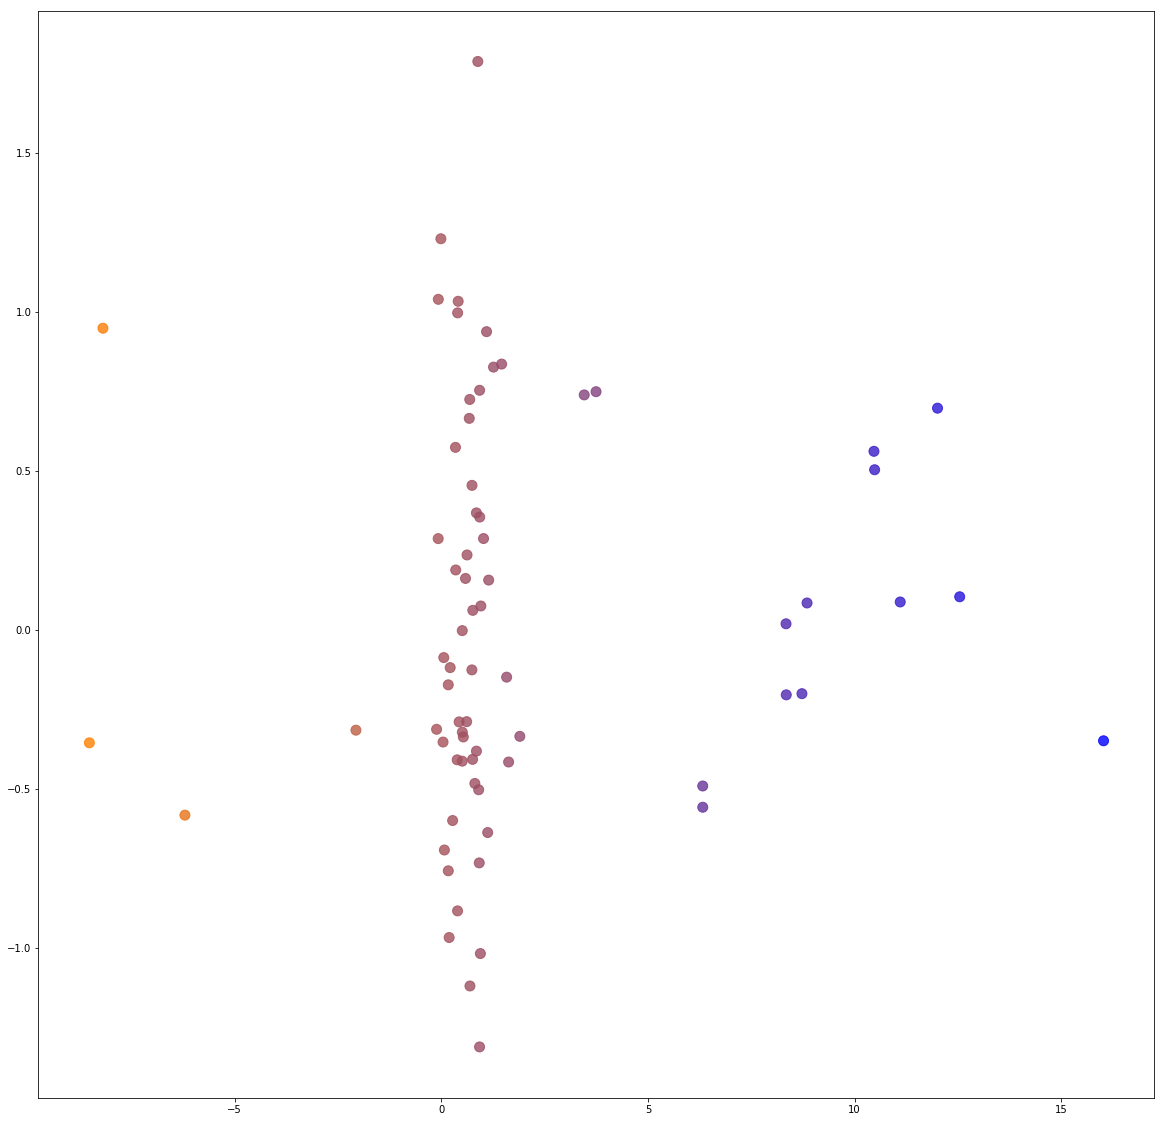

In [13]:
#D=100, .6730/.7391
#D=358, .6954/.6734

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
# pca = TSNE(n_components=2)

select_ixs = list(set(list(tqz.flatten()))) # just get the unique q indices used in our test set

q_weights = qn_table.get_weights()[0]
# itemz_2 = q_weights
itemz_2 = pca.fit_transform(q_weights)

fig = plt.gcf()
fig.set_size_inches(20, 20)

import scipy, math
norms = []
for i in select_ixs:
    w = q_weights[i,:]
    norm = scipy.linalg.norm(w)
    norms.append(norm)

norms = numpy.array(norms)-numpy.min(norms)
norms = norms/numpy.max(norms)
rgba_colours = numpy.array([(n,n/2,1-n,0.8) for n in norms])
# rgba_colours = numpy.array([(1,0,0,n) for n in norms])
# print(rgba_colours)

#n = len(itemz_2)
# fig.gca().scatter(itemz_2[n:,0], itemz_2[n:,1], alpha=0.7)
fig.gca().scatter(itemz_2[select_ixs,0], itemz_2[select_ixs,1], color=rgba_colours, s=100)
for qid in ps_seen: # set(tqz.flatten()):
    q = ps_seen.index(qid)
#     print(q)
    if q_atts[q] == 0:
        continue
    w = q_weights[q,:]
    norm = scipy.linalg.norm(w)
    print(q)
    x,y = itemz_2[q,0], itemz_2[q,1]
#     fig.gca().plot([x,xh],[y,yh],color="#aaaaaa")
    qid = qixs[int(q)]
    print(qid)
    prate = q_pass[qid]/q_atts[qid]
    kcs = p_kc[qid]
#     kcs = "\n".join([k[4:] for k in kcs])
    steps = len(p_st[qid])
#     fig.gca().annotate("{} {}x{}".format(qid,steps,kcs), (itemz_2[q,0], itemz_2[q,1]))
    fig.gca().annotate("{}\n({} {}) {}".format(qid, steps, len(kcs), round(prate,2), round(norm,2)), (itemz_2[q,0], itemz_2[q,1]))
fig.show()

SyntaxError: invalid syntax (<ipython-input-12-1f500596c4ae>, line 1)